In [14]:
import pandas as pd

df = pd.read_csv('./Downloads/Whole_Fleet_Vehicle_Registration_Snapshot_by_Postcode_Q2_2023.csv')
df

,D_MAKE_VEH1,CD_CLASS_VEH,NB_YEAR_MFC_VEH,POSTCODE,CD_CL_FUEL_ENG,TOTAL1
0,A AUST,2,1998,3431,D,1
1,A B C,2,2021,3076,E,1
2,A B C,2,2022,3053,E,1
3,A BARF,2,1973,3277,D,1
4,A BARF,2,1967,3302,D,1
...,...,...,...,...,...,...
1055357,ZONGSH,3,1995,3885,P,1
1055358,ZUMA,2,2011,3224,D,1
1055359,ZUMA,2,2007,3719,P,1
1055360,ZUMA,2,2014,3875,P,1


In [15]:
aggregated_df = df.groupby("POSTCODE").size().reset_index(name="CAR_COUNT")
aggregated_df

,POSTCODE,CAR_COUNT
0,0,52
1,3,6
2,478,1
3,800,2
4,810,9
...,...,...
1780,8047,1
1781,9000,488
1782,9371,1
1783,9392,1


In [56]:
filtered_df_e = df[df["CD_CL_FUEL_ENG"].str.strip() == 'E']

# Grouping by 'POSTCODE' and counting the number of cars
aggregated_df_electric = filtered_df_e.groupby("POSTCODE").size().reset_index(name="CAR_COUNT")
aggregated_df_electric

,POSTCODE,CAR_COUNT
0,2065,1
1,2153,1
2,2220,1
3,3000,116
4,3001,4
...,...,...
566,3992,2
567,3995,26
568,3996,18
569,4566,1


In [38]:
aggregated_df_electric.to_csv('Electric_count_postcode.csv', index=False)

In [17]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample aggregated data with electric car counts per postcode
aggregated_data = filtered_df_e

# Load geospatial data (GeoDataFrame) with postcode shapes
# Replace 'path_to_shapefile' with the actual path to your shapefile
gdf_postcodes = gpd.read_file('./Downloads/POA_2021_AUST_GDA2020_SHP/POA_2021_AUST_GDA2020.shp')

gdf_postcodes.rename(columns={'POA_CODE21': 'POSTCODE'}, inplace=True)

# Merge aggregated data with geospatial data
merged_data = gdf_postcodes.merge(pd.DataFrame(aggregated_data), on='POSTCODE')

# Create a heatmap using seaborn
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='CAR_COUNT', ax=ax, legend=True, cmap='YlOrRd', edgecolor='grey')
ax.set_title('Electric Car Heatmap by Postcode')
plt.axis('off')

plt.show()


KeyError: 'POSTCODE'

In [44]:
gdf_postcodes = gpd.read_file('./Downloads/POA_2021_AUST_GDA2020_SHP/POA_2021_AUST_GDA2020.shp')

gdf_postcodes.column

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,0800,0800,AUS,Australia,3.1731,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.081893,0.000264,"POLYGON ((130.83681 -12.45376, 130.83684 -12.4..."
1,0810,0810,AUS,Australia,24.4283,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.241859,0.002031,"POLYGON ((130.89986 -12.36567, 130.89875 -12.3..."
2,0812,0812,AUS,Australia,35.8899,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.278788,0.002983,"POLYGON ((130.91915 -12.40786, 130.91831 -12.4..."
3,0820,0820,AUS,Australia,39.0642,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.409134,0.003248,"POLYGON ((130.85260 -12.43994, 130.85089 -12.4..."
4,0822,0822,AUS,Australia,150775.8030,http://linked.data.gov.au/dataset/asgsed3/POA/...,90.601831,12.564238,"MULTIPOLYGON (((136.56648 -12.08392, 136.56704..."
...,...,...,...,...,...,...,...,...,...
2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341555,0.636169,"MULTIPOLYGON (((144.79215 -41.46478, 144.79212..."
2640,7470,7470,AUS,Australia,108.2441,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.781048,0.011725,"POLYGON ((145.57769 -41.78640, 145.57686 -41.7..."
2641,9494,No usual address (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None
2642,9797,Migratory - Offshore - Shipping (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None


/var/folders/ld/t_3fnfvx26s9v0fvd_b7bj_c0000gn/T/ipykernel_45154/162957351.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_data['POSTCODE'] = aggregated_data['POSTCODE'].astype(str)


KeyError: 'CAR_COUNT'

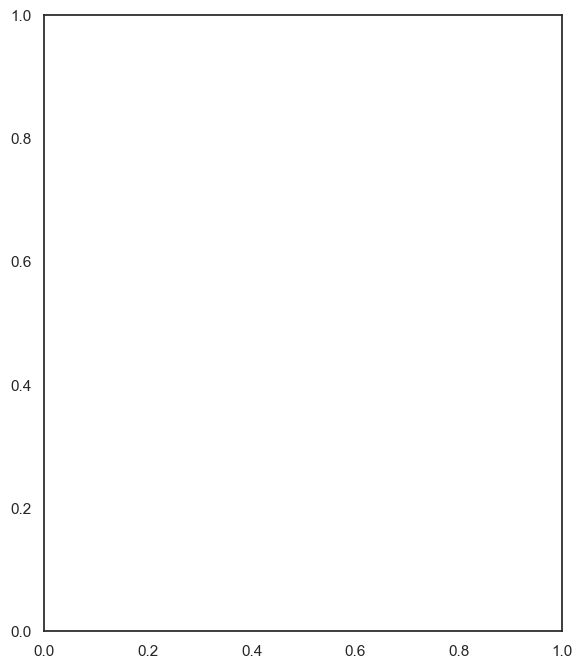

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample aggregated data with electric car counts per postcode
aggregated_data = filtered_df_e

# Load geospatial data (GeoDataFrame) with postcode shapes
# Replace 'path_to_shapefile' with the actual path to your shapefile
gdf_postcodes = gpd.read_file('./Downloads/POA_2021_AUST_GDA2020_SHP/POA_2021_AUST_GDA2020.shp')

gdf_postcodes.rename(columns={'POA_CODE21': 'POSTCODE'}, inplace=True)

# Convert 'POSTCODE' column to string data type in both DataFrames
gdf_postcodes['POSTCODE'] = gdf_postcodes['POSTCODE'].astype(str)
aggregated_data['POSTCODE'] = aggregated_data['POSTCODE'].astype(str)

# Merge aggregated data with geospatial data
merged_data = gdf_postcodes.merge(aggregated_data, on='POSTCODE')

# Create a heatmap using seaborn
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='CAR_COUNT', ax=ax, legend=True, cmap='YlOrRd', edgecolor='grey')
ax.set_title('Electric Car Heatmap by Postcode')
plt.axis('off')

plt.show()


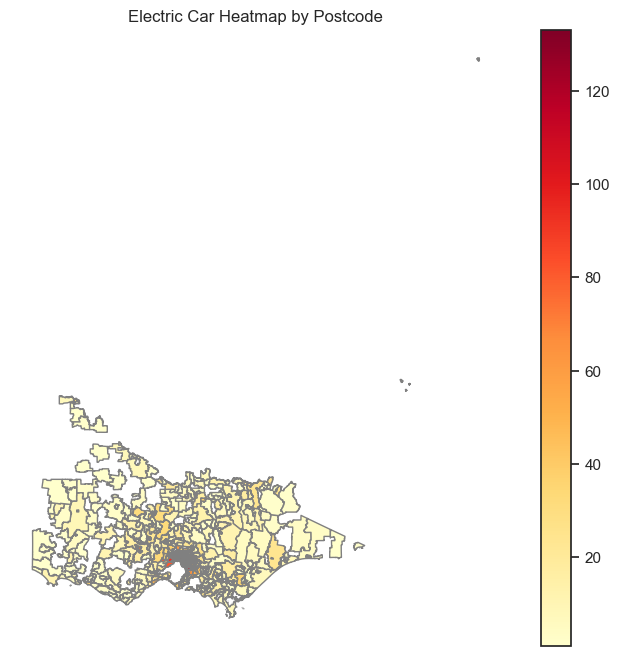

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample aggregated data with electric car counts per postcode
aggregated_data = aggregated_df_electric.copy()  # Create a copy to avoid modifying the original data

# Load geospatial data (GeoDataFrame) with postcode shapes
# Replace 'path_to_shapefile' with the actual path to your shapefile
gdf_postcodes = gpd.read_file('./Downloads/POA_2021_AUST_GDA2020_SHP/POA_2021_AUST_GDA2020.shp')

gdf_postcodes.rename(columns={'POA_CODE21': 'POSTCODE'}, inplace=True)

# Convert 'POSTCODE' column to string data type in both DataFrames
gdf_postcodes['POSTCODE'] = gdf_postcodes['POSTCODE'].astype(str)
aggregated_data['POSTCODE'] = aggregated_data['POSTCODE'].astype(str)

# Merge aggregated data with geospatial data
merged_data = gdf_postcodes.merge(aggregated_data, on='POSTCODE')

# Create a heatmap using seaborn
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))


merged_data.plot(column='CAR_COUNT', ax=ax, legend=True, cmap='YlOrRd', edgecolor='grey')
ax.set_title('Electric Car Heatmap by Postcode')
plt.axis('off')

plt.show()


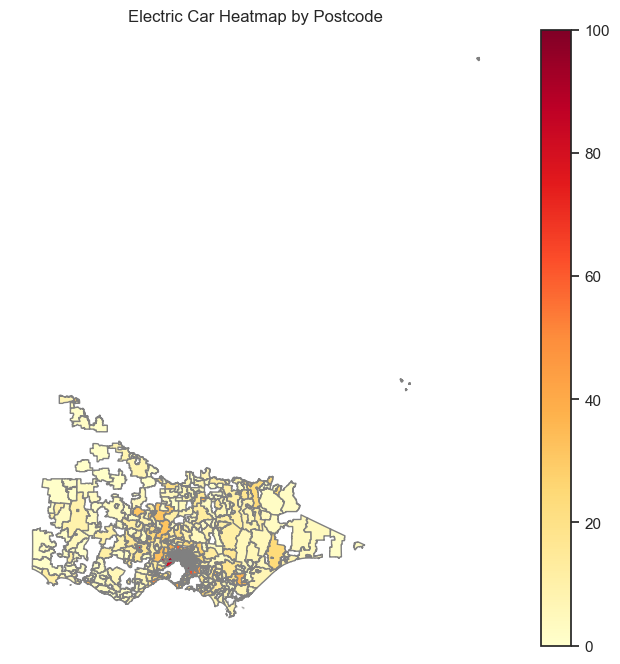

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample aggregated data with electric car counts per postcode
aggregated_data = aggregated_df_electric.copy()  # Create a copy to avoid modifying the original data

# Load geospatial data (GeoDataFrame) with postcode shapes
# Replace 'path_to_shapefile' with the actual path to your shapefile
gdf_postcodes = gpd.read_file('./Downloads/POA_2021_AUST_GDA2020_SHP/POA_2021_AUST_GDA2020.shp')

gdf_postcodes.rename(columns={'POA_CODE21': 'POSTCODE'}, inplace=True)

# Convert 'POSTCODE' column to string data type in both DataFrames
gdf_postcodes['POSTCODE'] = gdf_postcodes['POSTCODE'].astype(str)
aggregated_data['POSTCODE'] = aggregated_data['POSTCODE'].astype(str)

# Merge aggregated data with geospatial data
merged_data = gdf_postcodes.merge(aggregated_data, on='POSTCODE')

# Create a heatmap using seaborn
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))


merged_data.plot(column='CAR_COUNT', ax=ax, legend=True, cmap='YlOrRd', edgecolor='grey', vmin=0, vmax=100)
ax.set_title('Electric Car Heatmap by Postcode')
plt.axis('off')

plt.show()


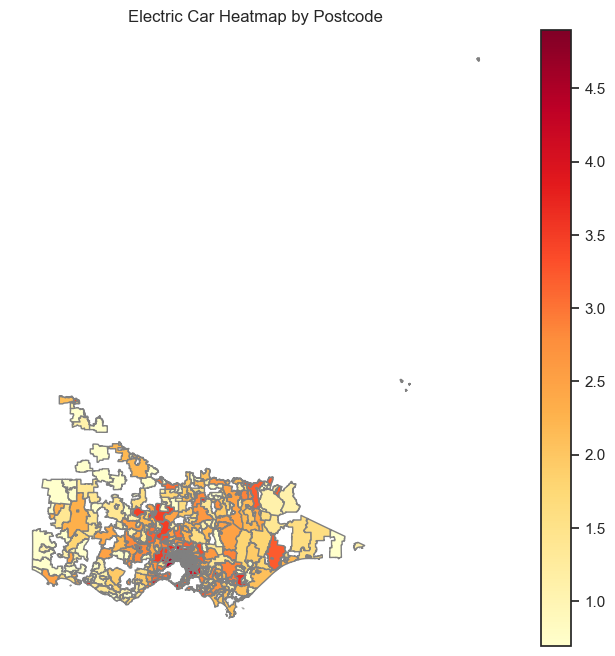

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample aggregated data with electric car counts per postcode
aggregated_data = aggregated_df_electric.copy()  # Create a copy to avoid modifying the original data

# Load geospatial data (GeoDataFrame) with postcode shapes
# Replace 'path_to_shapefile' with the actual path to your shapefile
gdf_postcodes = gpd.read_file('./Downloads/POA_2021_AUST_GDA2020_SHP/POA_2021_AUST_GDA2020.shp')

gdf_postcodes.rename(columns={'POA_CODE21': 'POSTCODE'}, inplace=True)

# Convert 'POSTCODE' column to string data type in both DataFrames
gdf_postcodes['POSTCODE'] = gdf_postcodes['POSTCODE'].astype(str)
aggregated_data['POSTCODE'] = aggregated_data['POSTCODE'].astype(str)

# Merge aggregated data with geospatial data
merged_data = gdf_postcodes.merge(aggregated_data, on='POSTCODE')

# Create a heatmap using seaborn
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))


merged_data['log_CAR_COUNT'] = np.log1p(merged_data['CAR_COUNT'])
merged_data.plot(column='log_CAR_COUNT', ax=ax, legend=True, cmap='YlOrRd', edgecolor='grey')

ax.set_title('Electric Car Heatmap by Postcode')
plt.axis('off')

plt.show()


In [75]:
max_car_count = aggregated_df_electric['CAR_COUNT'].max()
postcode_with_max_count = aggregated_df_electric[aggregated_df_electric['CAR_COUNT'] == max_car_count]['POSTCODE'].values[0]
postcode_with_max_count

'3076'

In [77]:
aggregated_data.rename(columns={'POSTCODE': 'POA_CODE21'}, inplace=True)
aggregated_data.to_csv('Electric_count_postcode_POA.csv', index=False)

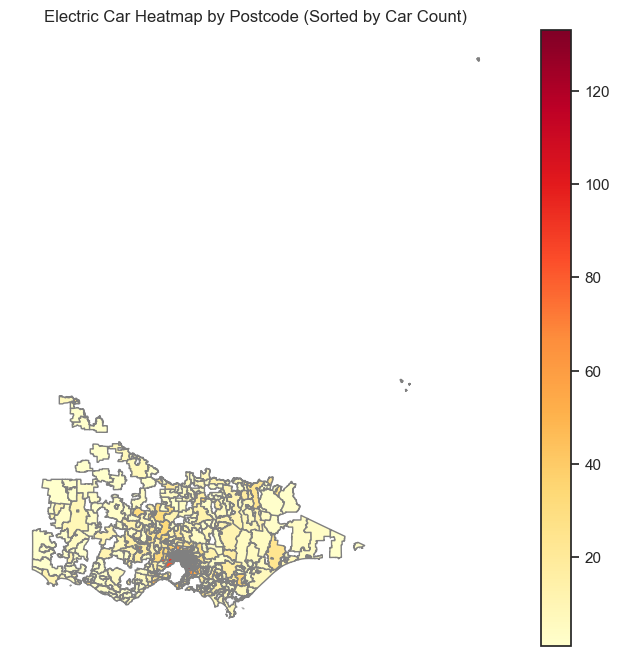

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample aggregated data with electric car counts per postcode
aggregated_data = aggregated_df_electric.copy()

# Load geospatial data (GeoDataFrame) with postcode shapes
# Replace 'path_to_shapefile' with the actual path to your shapefile
gdf_postcodes = gpd.read_file('./Downloads/POA_2021_AUST_GDA2020_SHP/POA_2021_AUST_GDA2020.shp')

gdf_postcodes.rename(columns={'POA_CODE21': 'POSTCODE'}, inplace=True)

# Convert 'POSTCODE' column to string data type in both DataFrames
gdf_postcodes['POSTCODE'] = gdf_postcodes['POSTCODE'].astype(str)
aggregated_data['POSTCODE'] = aggregated_data['POSTCODE'].astype(str)

# Merge aggregated data with geospatial data
merged_data = gdf_postcodes.merge(aggregated_data, on='POSTCODE')

# Sort data by the number of cars per postcode
merged_data_sorted = merged_data.sort_values(by='CAR_COUNT', ascending=False)

# Create a custom colormap with a color for missing or NaN values
cmap = plt.get_cmap('YlOrRd')
cmap.set_bad(color='gray')

# Create a heatmap using seaborn
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 8))

merged_data_sorted.plot(column='CAR_COUNT', ax=ax, legend=True, cmap=cmap, edgecolor='grey')
ax.set_title('Electric Car Heatmap by Postcode (Sorted by Car Count)')
plt.axis('off')

plt.show()


In [80]:
filtered_data = df[df['CD_CL_FUEL_ENG'].isin(['E', 'P'])]
grouped_data = filtered_data.groupby(['POSTCODE', 'CD_CL_FUEL_ENG'])['TOTAL1'].sum().reset_index()
pivot_data = grouped_data.pivot(index='POSTCODE', columns='CD_CL_FUEL_ENG', values='TOTAL1').fillna(0)
pivot_data['Total_E_and_P'] = pivot_data['E'] + pivot_data['P']
pivot_data['E_Percentage'] = pivot_data['E'] / pivot_data['Total_E_and_P'] * 100
pivot_data['P_D_Percentage'] = pivot_data['P'] / pivot_data['Total_E_and_P'] * 100


KeyError: 'E'

In [149]:
import pandas as pd

# Create a DataFrame from your dataset


#print(df)

# Calculate the total number of E cars and normal cars per suburb
e_car_counts = df[df["CD_CL_FUEL_ENG"].str.strip() == 'E'].groupby("POSTCODE")["TOTAL1"].sum()
normal_car_counts = df[df["CD_CL_FUEL_ENG"].str.strip() != 'E'].groupby("POSTCODE")["TOTAL1"].sum()


print(normal_car_counts)

# Calculate the ratio of E cars to total cars for each suburb
ratios = e_car_counts / (e_car_counts + normal_car_counts)

#Fill NaN values with 0 (for cases where there are no E cars)
#ratios = ratios.fillna(0)

ratios.dropna(inplace=True)

# Print the ratios for each suburb
print(ratios)

ratio_df = pd.DataFrame(ratios)
ratio_df

ratio_df['Postcode'] = ratio_df['Postcode']

POSTCODE
0        56
3         6
478       1
800       2
810       9
       ... 
8047      1
9000    723
9371      1
9392      1
9999      3
Name: TOTAL1, Length: 1785, dtype: int64
POSTCODE
2065    0.111111
2153    0.076923
2220    0.250000
3000    0.025760
3001    0.039604
          ...   
3992    0.001349
3995    0.005099
3996    0.004403
4566    0.083333
9000    0.001381
Name: TOTAL1, Length: 571, dtype: float64


,TOTAL1
POSTCODE,
2065,0.111111
2153,0.076923
2220,0.250000
3000,0.025760
3001,0.039604
...,...
3992,0.001349
3995,0.005099
3996,0.004403


In [151]:
ratio_df = ratios.to_frame().reset_index()
ratio_df

,POSTCODE,TOTAL1
0,2065,0.111111
1,2153,0.076923
2,2220,0.250000
3,3000,0.025760
4,3001,0.039604
...,...,...
566,3992,0.001349
567,3995,0.005099
568,3996,0.004403
569,4566,0.083333


In [152]:
ratio_df.to_csv('Electric_ratio.csv', index=False)

In [157]:
top_5_highest = ratio_df.nsmallest(10, "TOTAL1")
top_5_highest

,POSTCODE,TOTAL1
336,3549,0.000169
349,3568,0.000229
242,3304,0.000266
362,3621,0.000332
489,3847,0.000348
288,3414,0.000430
289,3418,0.000452
400,3700,0.000481
317,3467,0.000524
326,3501,0.000531
